In [33]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import pandas as pd
import sys

sys.path.append('../')

       0    1    2    3               4
0    5.1  3.5  1.4  0.2     Iris-setosa
1    4.9  3.0  1.4  0.2     Iris-setosa
2    4.7  3.2  1.3  0.2     Iris-setosa
3    4.6  3.1  1.5  0.2     Iris-setosa
4    5.0  3.6  1.4  0.2     Iris-setosa
..   ...  ...  ...  ...             ...
145  6.7  3.0  5.2  2.3  Iris-virginica
146  6.3  2.5  5.0  1.9  Iris-virginica
147  6.5  3.0  5.2  2.0  Iris-virginica
148  6.2  3.4  5.4  2.3  Iris-virginica
149  5.9  3.0  5.1  1.8  Iris-virginica

[150 rows x 5 columns]


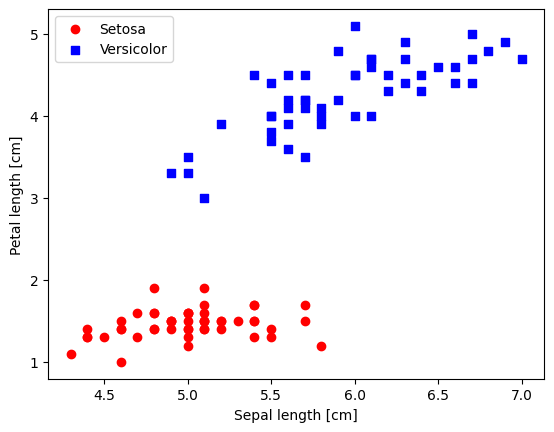

In [34]:
df = pd.read_csv('../data/iris.data', header=None, encoding='utf-8')
print(df)

y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', 0, 1)

# extract 1st, 3rd feature columns
X = df.iloc[0:100, [0, 2]].values

# in iris.data, we have 50 Setosas and 50 Versicolors
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='Setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='s', label='Versicolor')
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')
plt.show()


## Classify using Perceptron

In [35]:
from classifier.linear import Perceptron
from classifier.linear import AdalineGD
from classifier.plot import plot_decision_regions

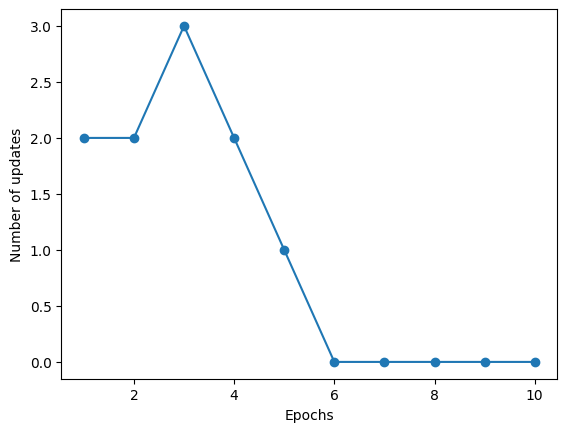

In [36]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

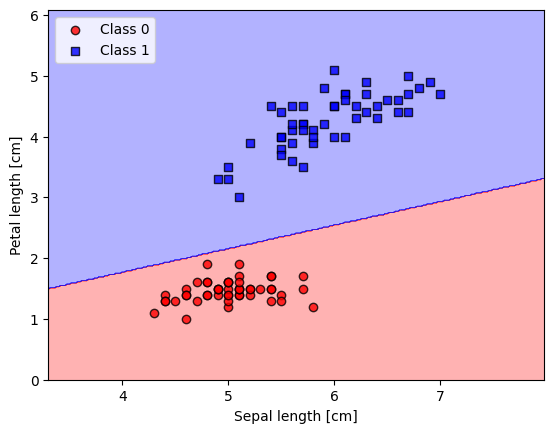

In [37]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')
plt.show()

## classify using ADALineGD

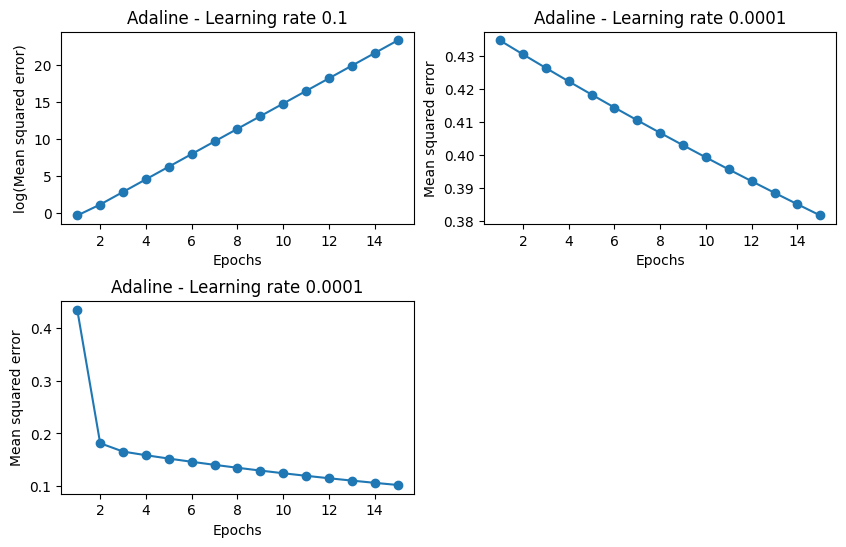

In [49]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 6),gridspec_kw={'hspace': 0.4})
ada1 = AdalineGD(n_iter=15, eta=0.1).fit(X, y)
ax[0,0].plot(range(1, len(ada1.losses_) + 1), np.log10(ada1.losses_), marker='o')
ax[0,0].set_xlabel('Epochs')
ax[0,0].set_ylabel('log(Mean squared error)')
ax[0,0].set_title('Adaline - Learning rate 0.1')

ada2 = AdalineGD(n_iter=15, eta=0.0001).fit(X, y)
ax[0,1].plot(range(1, len(ada2.losses_) + 1), ada2.losses_, marker='o')
ax[0,1].set_xlabel('Epochs')
ax[0,1].set_ylabel('Mean squared error')
ax[0,1].set_title('Adaline - Learning rate 0.0001')

ada3 = AdalineGD(n_iter=15, eta=0.01).fit(X, y)
ax[1,0].plot(range(1, len(ada3.losses_) + 1), ada3.losses_, marker='o')
ax[1,0].set_xlabel('Epochs')
ax[1,0].set_ylabel('Mean squared error')
ax[1,0].set_title('Adaline - Learning rate 0.0001')

fig.delaxes(ax[1,1])
plt.show()